In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

https://github.com/irgroup/DIS22_ARTS_Project/blob/main/task_concepts/antwortdauer_%26_simplizit%C3%A4t_concept.md

In [2]:
files = os.listdir("../export")
base = "../export/"
rater_matches = {}
for i in range(0,len(files)):
    if "Scores" not in files[i] and "-94" in files[i] and "_" not in files[i]:
        df = pd.read_csv(base+files[i])
        df["time_diff_seconds"] = 0
        timestamps = pd.to_datetime(df['time'], format='%H:%M:%S')
        for y in range(1, len(df)):
            if timestamps[y] < timestamps[y-1]:
                timestamps[y] += pd.Timedelta(days = 1)
                df.loc[y-1, "time_diff_seconds"] = (timestamps[y] - timestamps[y-1]).total_seconds()
                timestamps[y] -= pd.Timedelta(days = 1)
            else:
                df.loc[y-1, "time_diff_seconds"] = (timestamps[y] - timestamps[y-1]).total_seconds()
        rater_matches[files[i].split(".")[0]] = df

In [3]:
rater_matches

{'aab-94':      Unnamed: 0 candidates  winner      time  left  right  time_diff_seconds
 0             0   (57, 51)      57  12:20:02    57     51                 12
 1             1   (45, 69)      45  12:20:14    45     69                 10
 2             2   (29, 93)      93  12:20:24    29     93                 21
 3             3    (1, 67)       1  12:20:45     1     67                 14
 4             4   (20, 27)      27  12:20:59    20     27                 18
 ..          ...        ...     ...       ...   ...    ...                ...
 371         371   (10, 47)      10  14:09:43    10     47                  5
 372         372   (67, 31)      67  14:09:48    67     31                 20
 373         373   (61, 90)      90  14:10:08    61     90                 13
 374         374   (49, 82)      82  14:10:21    49     82                  6
 375         375    (86, 0)      86  14:10:27    86      0                  0
 
 [376 rows x 7 columns],
 'ArthMa-94':      Unnamed:

In [9]:
len(rater_matches)

15

In [5]:
list(rater_matches.values())[0]

,Unnamed: 0,candidates,winner,time,left,right,time_diff_seconds
0,0,"(57, 51)",57,12:20:02,57,51,12
1,1,"(45, 69)",45,12:20:14,45,69,10
2,2,"(29, 93)",93,12:20:24,29,93,21
3,3,"(1, 67)",1,12:20:45,1,67,14
4,4,"(20, 27)",27,12:20:59,20,27,18
...,...,...,...,...,...,...,...
371,371,"(10, 47)",10,14:09:43,10,47,5
372,372,"(67, 31)",67,14:09:48,67,31,20
373,373,"(61, 90)",90,14:10:08,61,90,13
374,374,"(49, 82)",82,14:10:21,49,82,6


In [4]:
def textlaenge_einfachheit():
    base = "../export/"
    gold_ranking = pd.read_csv(base + "Scores___Gold15.csv")
    gold_ranking["text_len"] = gold_ranking["Text"].apply(lambda x: len(x))
    gold_ranking["text_len_normalized"] = (gold_ranking["text_len"]-min(gold_ranking["text_len"]))/(max(gold_ranking["text_len"])-min(gold_ranking["text_len"]))
    sns.regplot(x = gold_ranking['text_len_normalized'], y = gold_ranking['Score'])
    plt.show()
    print("Korrelation zwischen textlänge/einfachheit:", round(gold_ranking['text_len_normalized'].corr(gold_ranking['Score']), 3))

def antwortzeit_im_laufe_der_befragung():
    files = os.listdir("../export") # die ersten paar sind noch unique, dann wiederholt sich 47
    base = "../export/"
    rater_dic = {}
    for i in range(0,len(files)):
        if "Scores" not in files[i] and "-94" in files[i] and "_" not in files[i]:
            df = pd.read_csv(base+files[i])
            df["time_diff_seconds"] = 0
            timestamps = pd.to_datetime(df['time'], format='%H:%M:%S')
            for y in range(1, len(df)):
                if timestamps[y] < timestamps[y-1]:
                    timestamps[y] += pd.Timedelta(days = 1)
                    df.loc[y-1, "time_diff_seconds"] = (timestamps[y] - timestamps[y-1]).total_seconds()
                    timestamps[y] -= pd.Timedelta(days = 1)
                else:
                    df.loc[y-1, "time_diff_seconds"] = (timestamps[y] - timestamps[y-1]).total_seconds()
            rater_dic[files[i].split(".")[0]] = df
    time_diff_values = np.zeros(376 * len(rater_dic.values())).reshape(376, len(rater_dic.values()))
    for i, value in enumerate(rater_dic.values()):
        time_diff_values[:, i] += value["time_diff_seconds"].values
    median_time_per_questions = np.zeros(376)
    for i in range(0, len(time_diff_values)):
        median_time_per_questions[i] = np.median(time_diff_values[i])
    sns.lineplot(data = pd.Series(median_time_per_questions).rolling(10).mean()) # 
    plt.show() 

def durschnittliche_wortlaenge_einfachheit():
    base = "../export/"
    gold_ranking = pd.read_csv(base + "Scores___Gold15.csv")
    texts = pd.read_csv(base + "texts.csv")
    texts["wordlen"] = 0
    for i in range(0, len(texts.index)):
        words = texts.iloc[i]["Text"].replace(",", "").replace(".", "").split()
        average_len = 0
        for word in words:
            average_len += len(word)
        average_len = average_len / len(words)
        texts.loc[i, "wordlen"] = average_len
    texts["Score"] = gold_ranking["Score"]
    sns.regplot(x = texts['wordlen'], y = texts['Score'])
    plt.show()
    print("Korrelation zwischen Durchschnittliche Wortlänge/einfachheit:", round(texts['wordlen'].corr(texts['Score']), 3))

def antwortzeit_tageszeit():
    files = os.listdir("../export") # die ersten paar sind noch unique, dann wiederholt sich 47
    base = "../export/"
    rater_dic = {}
    for i in range(0,len(files)):
        if "Scores" not in files[i] and "-94" in files[i] and "_" not in files[i]:
            df = pd.read_csv(base+files[i])
            df["time_diff_seconds"] = 0
            df["seconds_since_day_normalized"] = 0
            timestamps = pd.to_datetime(df['time'], format='%H:%M:%S')
            
            # hier die Time difference falls über mehrere Tage geht weil jemand erst am nächsten Tag 
            for y in range(1, len(df)):
                if timestamps[y] < timestamps[y-1]:
                    timestamps[y] += pd.Timedelta(days = 1)
                    df.loc[y-1, "time_diff_seconds"] = (timestamps[y] - timestamps[y-1]).total_seconds()
                    timestamps[y] -= pd.Timedelta(days = 1)
                else:
                    df.loc[y-1, "time_diff_seconds"] = (timestamps[y] - timestamps[y-1]).total_seconds()
                timestr = df.loc[y-1, "time"].split(":")
                df.loc[y-1, "seconds_since_day_normalized"] = ((int(timestr[0]) * 60 * 60) + (int(timestr[1]) * 60) + int(timestr[2])) / 86400
            rater_dic[files[i].split(".")[0]] = df # das Rater Dic füllen
            
            
    time_diff_values = np.zeros(376 * len(rater_dic.values())).reshape(376, len(rater_dic.values()))
    for i, value in enumerate(rater_dic.values()):
        time_diff_values[:, i] += value["time_diff_seconds"].values # für jeden Rater die Antwortzeit sammeln pro Frage in NP Array
    median_time_per_questions = np.zeros(376)
    for i in range(0, len(time_diff_values)):
        median_time_per_questions[i] = np.median(time_diff_values[i])

    time_timediff = []
    for value in rater_dic.values():
        for i in range(0, len(value["time_diff_seconds"])):
            if value.loc[i, "time_diff_seconds"] > 5 * 60:
                value.loc[i, "time_diff_seconds"] = median_time_per_questions[i]
            time_timediff.append([value.loc[i, "seconds_since_day_normalized"], value.loc[i, "time_diff_seconds"]])
    time_timediff = np.array(time_timediff)
    sns.scatterplot(x = time_timediff[:, 0], y = time_timediff[:, 1])
    plt.show()

def score_differenz_antwortzeit():
    files = os.listdir("../export") 
    base = "../export/"
    rater_dic = {}
    for i in range(0,len(files)):
        if "Scores" not in files[i] and "-94" in files[i] and "_" not in files[i]:
            df = pd.read_csv(base+files[i])
            df["time_diff_seconds"] = 0
            timestamps = pd.to_datetime(df['time'], format='%H:%M:%S')
            for y in range(1, len(df)):
                if timestamps[y] < timestamps[y-1]:
                    timestamps[y] += pd.Timedelta(days = 1)
                    df.loc[y-1, "time_diff_seconds"] = (timestamps[y] - timestamps[y-1]).total_seconds()
                    timestamps[y] -= pd.Timedelta(days = 1)
                else:
                    df.loc[y-1, "time_diff_seconds"] = (timestamps[y] - timestamps[y-1]).total_seconds()
            rater_dic[files[i].split(".")[0]] = df
    time_diff_values = np.zeros(376 * len(rater_dic.values())).reshape(376, len(rater_dic.values()))
    for i, value in enumerate(rater_dic.values()):
        time_diff_values[:, i] += value["time_diff_seconds"].values
    median_time_per_questions = np.zeros(376)
    for i in range(0, len(time_diff_values)):
        median_time_per_questions[i] = np.median(time_diff_values[i])

    base = "../export/"
    gold_ranking = pd.read_csv(base + "Scores___Gold15.csv")
    data = pd.DataFrame({"matches" : df["candidates"].copy()})
    data["abs_score_diff"] = 0
    for i in range(0, len(data.index)):
        match = data["matches"].iloc[i].replace("(", "").replace(")", "").split(",")
        text1 = int(match[0])
        text2 = int(match[1])
        data.loc[i, "abs_score_diff"] = abs(gold_ranking.iloc[text1]["Score"] - gold_ranking.iloc[text2]["Score"])

    data["median_time_match"] = median_time_per_questions
    sns.regplot(x = data["abs_score_diff"], y = data["median_time_match"])
    plt.show()
    print("Korrelation zwischen Differenz der Schwierigkeit in einem match/Antwortzeit:", round(data["abs_score_diff"].corr(data["median_time_match"]), 3))

In [5]:
base = "../export/"
gold_ranking = pd.read_csv(base + "Scores___Gold15.csv")

In [14]:
gold_ranking

,Unnamed: 0,Score,Text
0,0,0.50538,"Meanwhile, on Raw, fans were immersed in the f..."
1,1,0.25806,Dows is a city in franklin and wright counties...
2,2,0.23656,"Dauenhauer died at her home in Juneau, Alaska ..."
3,3,0.40860,The meetings of the Federal Council and the re...
4,4,0.97849,After a four day pass the Brigade conducted it...
...,...,...,...
89,89,0.01075,Ohio state's library system includes twenty-on...
90,90,0.98925,The polysaccharide antigens were used to stimu...
91,91,0.26882,"In these cases, the symptoms are often severe ..."
92,92,0.91398,"In the seventies, Robert Austrian championed t..."


# Hat eine höhere Differenz der Schwierigkeit der Texte Einfluss auf die Antwortzeit

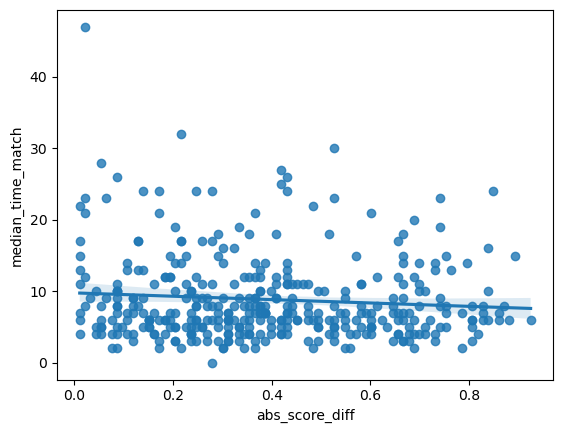

Korrelation zwischen Differenz der Schwierigkeit in einem match/Antwortzeit: -0.091


In [6]:
score_differenz_antwortzeit()
# vergleich von antwortzeit zu differenz des scores. brauchen die leute länger wenn der die differenz geringer ist?
# negative korrelation = je höher desto niedriger
# positive korrelation = je höher desto höher
# niedrige korrelation, aber nicht sehr signifikant.

# Textlänge / Einfachheit

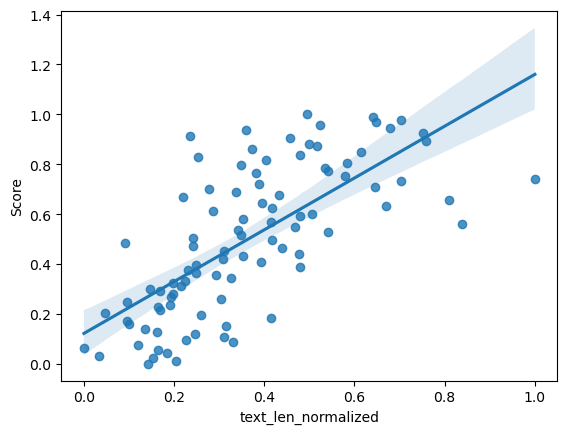

Korrelation zwischen textlänge/einfachheit: 0.71


In [7]:
textlaenge_einfachheit()
# hohe korrelation weil leute vlt auf kürzere texte intuitiv klicken ohne nachzudenken.

# Antwortdauer im Laufe der Befragung

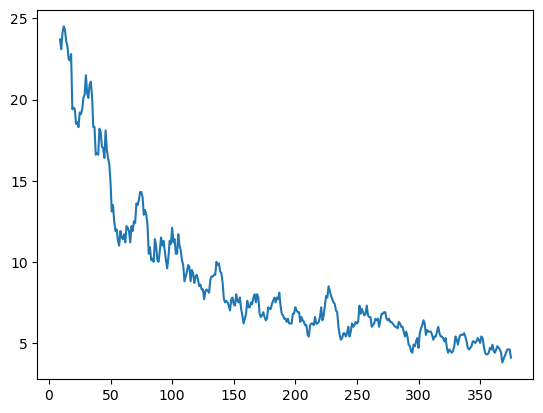

In [8]:
antwortzeit_im_laufe_der_befragung()
# y = median antwortzeit
# x = match n
# in die intervalle aufteilen linie auf der timeline
# 10er moving average für ausreißer...
# nimmt die Antwortdauer ab desto öfter man die Text gesehen hat (47)

# Durchschnittliche Wortlänge & Einfachheit

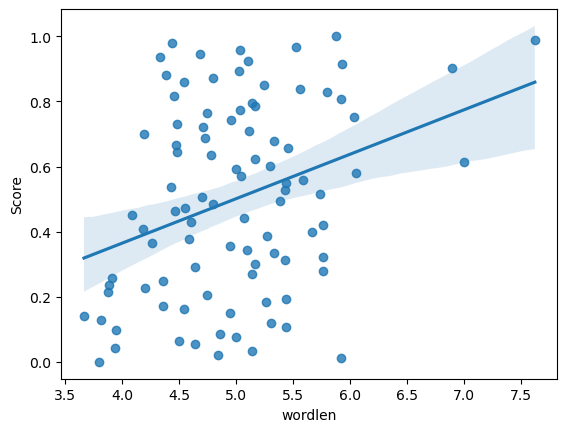

Korrelation zwischen Durchschnittliche Wortlänge/einfachheit: 0.328


In [9]:
durschnittliche_wortlaenge_einfachheit()
# durschnitts wortlänge der texte x score
# 

# Antwortzeit x Tageszeit... 
wann brauchen die Rater am längsten / hat die Tageszeit Einfluss auf die Antwortdauer

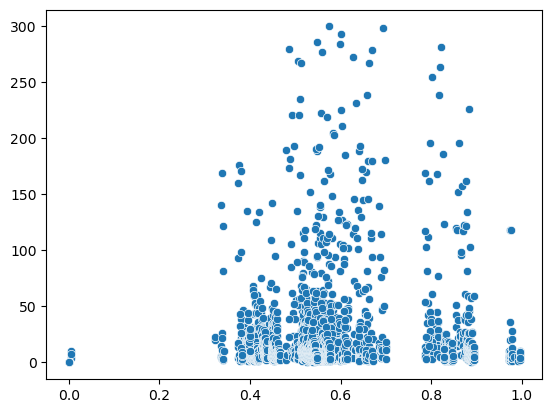

In [10]:
antwortzeit_tageszeit()
# y = antwortzeit in sekunden
# x = tageszeit (0-1 normalisiert)
# uhrzeit in sekunden seit 0 uhr rechnen dann durch anzahl der sekunden in einem tag teilen.

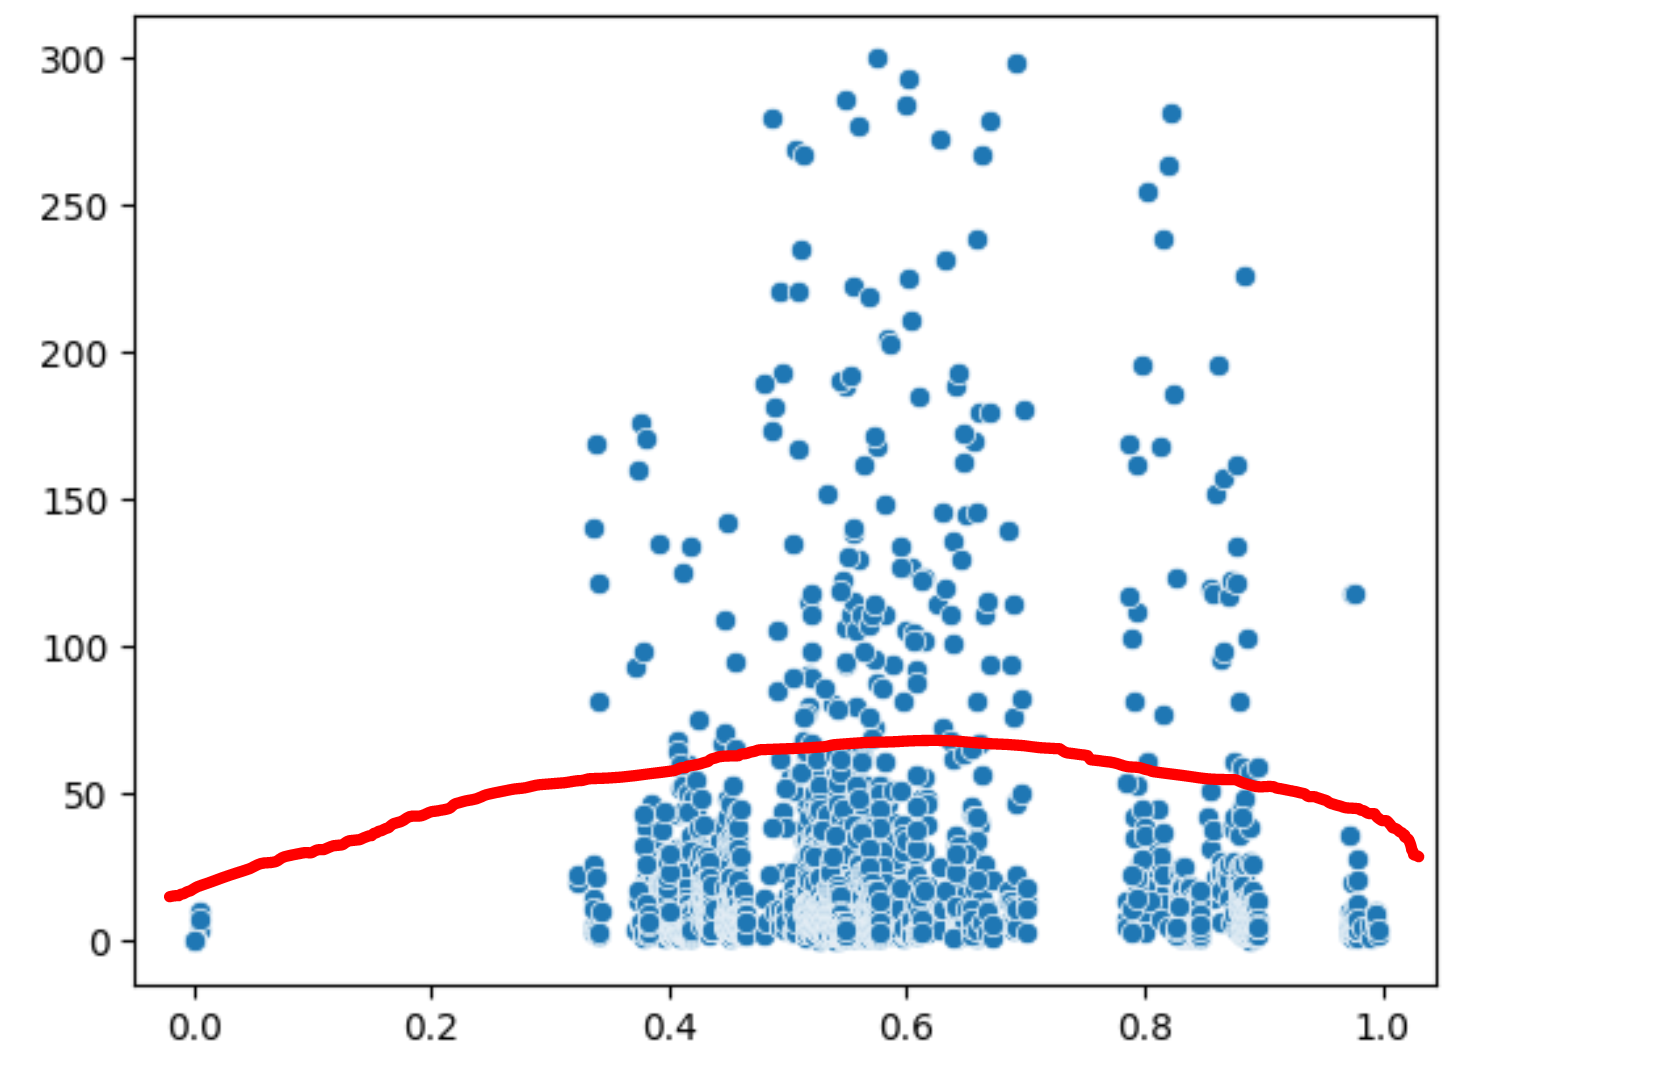

In [ ]:
# am längsten gegen mitte des Tages (siehe dichte)

In [2]:
import pandas as pd
import os

In [9]:
for i in (os.listdir("../Export")):
    if ".csv" in i:
        print(i)

aab-94.csv
aab_responses.csv
ArthMa-94.csv
ArthMa_responses.csv
Casomoto-94.csv
Casomoto_responses.csv
DisRating-94.csv
DisRating_responses.csv
english_level.csv
ghost-94.csv
ghost_responses.csv
IAA.csv
Kaffeetrinker-94.csv
Kaffeetrinker_responses.csv
mariggy23_responses.csv
MPC-Fragen.csv
Peter-94.csv
Peter_responses.csv
Power-94.csv
Power_responses.csv
Rater1-94.csv
Rater2-94.csv
Rater3-94.csv
Rater4-94.csv
Rater5-94.csv
Rater6-94.csv
Scores_aab-94.csv
Scores_ArthMa-94.csv
Scores_Casomoto-94.csv
Scores_DisRating-94.csv
Scores_ghost-94.csv
scores_gpt_160.csv
Scores_Kaffeetrinker-94.csv
Scores_Peter-94.csv
Scores_Power-94.csv
Scores_Rater1-94.csv
Scores_Rater2-94.csv
Scores_Rater3-94.csv
Scores_Rater4-94.csv
Scores_Rater5-94.csv
Scores_Rater6-94.csv
Scores_vikoooy-94.csv
Scores___Gold15.csv
Scores___gpt-4-1106-preview_old.csv
Scores___Links-94.csv
Scores___Rechts-94.csv
Texts.csv
vikoooy-94.csv
vikoooy_responses.csv
__Gold15.csv
__gpt-4-1106-preview_old.csv
__Links-94.csv
__Rechts-94.c

In [ ]:
Scores___Gold15.csv
Scores___gpt-4-1106-preview_old.csv
Scores___Links-94.csv
Scores___Rechts-94.csv
Texts.csv
vikoooy-94.csv
vikoooy_responses.csv
__Gold15.csv
__gpt-4-1106-preview_old.csv
__Links-94.csv
__Rechts-94.csv

In [20]:
pd.read_csv("../Export/__gpt-4-1106-preview_old.csv")

,Unnamed: 0,candidates,winner,time,left,right
0,0,"(57, 51)",57,11:08:12,57,51
1,1,"(45, 69)",69,11:08:13,45,69
2,2,"(29, 93)",93,11:08:14,29,93
3,3,"(1, 67)",67,11:08:15,1,67
4,4,"(20, 27)",27,11:08:16,20,27
...,...,...,...,...,...,...
371,371,"(10, 47)",10,11:14:04,10,47
372,372,"(67, 31)",31,11:14:04,67,31
373,373,"(61, 90)",90,11:14:05,61,90
374,374,"(49, 82)",82,11:14:06,49,82


In [19]:
pd.read_csv("../Export/__Gold15.csv.")

,Unnamed: 0,candidates,winner,time,left,right
0,0,"(57, 51)",57,00:00:00,57,51
1,1,"(45, 69)",45,00:00:00,45,69
2,2,"(29, 93)",93,00:00:00,29,93
3,3,"(1, 67)",1,00:00:00,1,67
4,4,"(20, 27)",27,00:00:00,20,27
...,...,...,...,...,...,...
371,371,"(10, 47)",10,00:00:00,10,47
372,372,"(67, 31)",31,00:00:00,67,31
373,373,"(61, 90)",90,00:00:00,61,90
374,374,"(49, 82)",82,00:00:00,49,82
